In [18]:
import cv2
import numpy as np
from numba import cuda
import matplotlib.pyplot as plt

In [27]:
def show_image(image, gray=False):
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image) 
    plt.axis('off')
    plt.show()

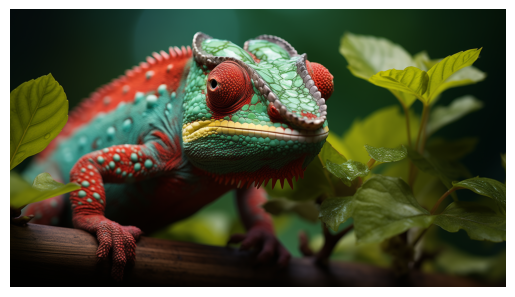

In [38]:
image = cv2.imread('test.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_image(image)

In [45]:
@cuda.jit
def rgb_to_grayscale_kernel(image, output, n):
    i = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    if i < n:
        output[i] = image[3 * i] * 0.21 + image[3 * i + 1] * 0.63 + image[3 * i + 2] * 0.16

In [46]:
def rgb_to_grayscale(image):
    w, h, c = image.shape
    n = w * h
    image = image.flatten().astype(np.float32)
    output = np.empty(n, dtype=np.float32)

    image_d = cuda.to_device(image)
    output_d = cuda.to_device(output)

    threadsperblock = 256
    blockspergrid = int((n + threadsperblock - 1) / threadsperblock)

    rgb_to_grayscale_kernel[blockspergrid, threadsperblock](image_d, output_d, n)

    output_d.copy_to_host(output)
    return output.reshape(w, h)

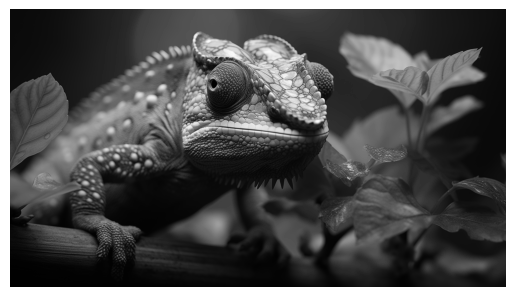

In [47]:
gray_image = rgb_to_grayscale(image)
show_image(gray_image, True)